In [131]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import pyswarms as ps

# Load Dataset

In [132]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [133]:
Y_train = Y_train.reshape(-1,)
Y_test = Y_test.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [134]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (50000, 32, 32, 3)
Shape of Y_train:  (50000,)
Shape of X_test:  (10000, 32, 32, 3)
Shape of Y_test:  (10000,)


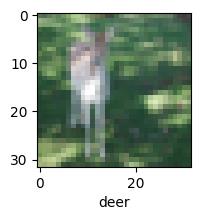

In [135]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


plot_sample(X_train, Y_train, random.randint(0, len(Y_train)))


In [136]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Model

In [138]:
cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])


In [ ]:
cnn.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))


Epoch 1/10
1563/1563 [==============================] - 42s 25ms/step - loss: 1.4281 - accuracy: 0.4876 - val_loss: 1.1992 - val_accuracy: 0.5800
Epoch 2/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0907 - accuracy: 0.6197 - val_loss: 1.0535 - val_accuracy: 0.6355
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9650 - accuracy: 0.6666 - val_loss: 0.9616 - val_accuracy: 0.6723
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8893 - accuracy: 0.6925 - val_loss: 0.9700 - val_accuracy: 0.6597
Epoch 5/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.8229 - accuracy: 0.7170 - val_loss: 0.9348 - val_accuracy: 0.6830
Epoch 6/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.7767 - accuracy: 0.7320 - val_loss: 0.9548 - val_accuracy: 0.6788
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7297 - accuracy: 0.7478 - val_loss: 0.8875 -

In [ ]:
# Define the fitness function for particle swarm optimization
def fitness_function(position):
    img = position.reshape((32, 32, 3))
    img = np.expand_dims(img, axis=0)
    prediction = cnn.predict(img)
    # Minimize the negative prediction score
    return -prediction[0][np.argmax(prediction)]


In [ ]:
# Define the particle swarm optimization optimizer
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=32*32*3, options={'c1': 0.5, 'c2': 0.3, 'w':0.9})

In [ ]:
# Run the particle swarm optimization algorithm on the test set
best_scores = []
for img in X_test:
    cost, pos = optimizer.optimize(fitness_function, iters=10, verbose=False)
    best_scores.append(-cost)

# Print the accuracy of the CNN model on the test set with and without bio-inspired optimization
print("CNN accuracy on test set:", cnn.evaluate(X_test, Y_test, verbose=0)[1])
print("CNN accuracy on test set with bio-inspired optimization:", np.mean(best_scores))


In [ ]:
cnn.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9404 - accuracy: 0.6918


[0.9404144287109375, 0.6917999982833862]

# Making predictions

1/1 [==============================] - 0s 130ms/step
Our model says it is a : truck 6741
1/1 [==============================] - 0s 24ms/step
Our model says it is a : bird 1606


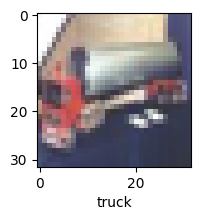

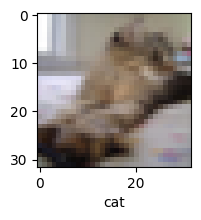

In [ ]:
index = random.randint(0, len(Y_test))
ind = 1606
y_pred = cnn.predict(X_test[index, :].reshape(1, 32, 32, 3))
y_pred = np.argmax(y_pred)

plot_sample(X_test, Y_test, index)

print("Our model says it is a :", classes[y_pred], index)

y_pred = cnn.predict(X_test[ind, :].reshape(1, 32, 32, 3))
y_pred = np.argmax(y_pred)

plot_sample(X_test, Y_test, ind)

print("Our model says it is a :", classes[y_pred], ind)
